# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1120.
Date:                Fri, 30 Jun 2023   Prob (F-statistic):           5.44e-43
Time:                        08:48:35   Log-Likelihood:                 5.8073
No. Observations:                  50   AIC:                            -3.615
Df Residuals:                      46   BIC:                             4.033
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0617      0.077     66.118      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.6151049   5.06006757  5.46976831  5.81971318  6.09424797  6.28913015
  6.41222591  6.48221776  6.52553502  6.57201162  6.64998441  6.78163753
  6.9793576   7.24369864  7.56329107  7.91670964  8.27599361  8.61124055
  8.8955193   9.10929462  9.24363679  9.30168877  9.29814977  9.25686026
  9.20688502  9.17773788  9.19453269  9.27385717  9.42104763  9.62931219
  9.88084668 10.14975982 10.40632709 10.62187436 10.773489   10.84778433
 10.84309904 10.76977011 10.64843452 10.50663858 10.37431224 10.27885158
 10.24061783 10.26959195 10.36373491 10.5093226  10.68320071 10.85658892
 10.99980939 11.08716279]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.09329034 10.98079625 10.76730577 10.49298457 10.21070482  9.97310021
  9.81967942  9.76715298  9.80534198  9.89967022]


## Plot comparison

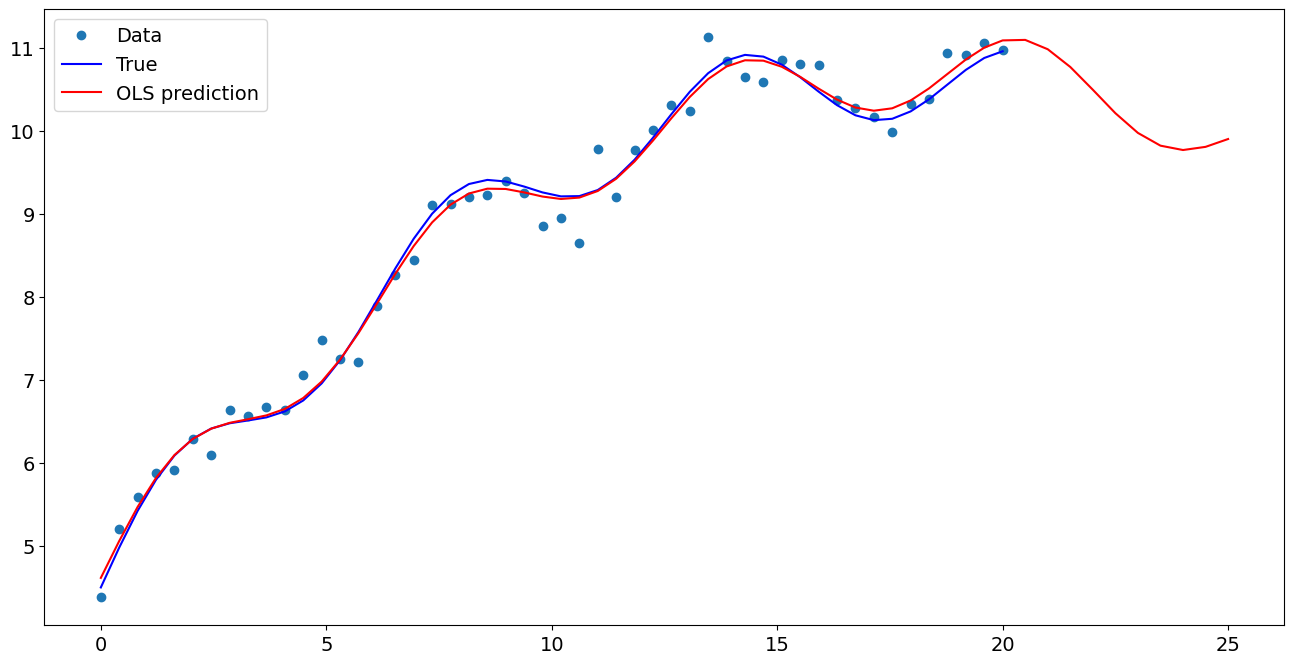

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.061732
x1                  0.481738
np.sin(x1)          0.449437
I((x1 - 5) ** 2)   -0.017865
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.093290
1    10.980796
2    10.767306
3    10.492985
4    10.210705
5     9.973100
6     9.819679
7     9.767153
8     9.805342
9     9.899670
dtype: float64